In [2]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

model = Doc2Vec.load('/home/tim/Uni/HPI/workspace/FEII/embedding')

In [4]:
import re
def infer(s):
    sc = re.sub(r'[^a-z ]', '', str(s).lower(), flags=re.IGNORECASE)
    return model.infer_vector(sc.split())

infer('hi')

array([-0.01096717,  0.00302218, -0.00473559, -0.00014424,  0.01145197,
        0.00079656,  0.0025138 ,  0.00510971, -0.0083817 ,  0.00286922,
        0.0101465 ,  0.00841482,  0.00818667,  0.00690664, -0.01158072,
       -0.00727899, -0.00946097,  0.00447227,  0.00832305, -0.01186278,
       -0.0007188 , -0.00324379,  0.00599167,  0.00685833, -0.00945967,
       -0.01165006,  0.00520443, -0.00251102, -0.00678709, -0.00873793,
       -0.00070455,  0.00128296, -0.0005177 , -0.01164008, -0.00886005,
       -0.0123305 ,  0.00626866,  0.00031838,  0.0106857 , -0.00412752], dtype=float32)

In [140]:
model.most_similar('loan', topn=20)

[('capitalrelated', 0.5866842865943909),
 ('graded', 0.5761352777481079),
 ('validated', 0.49101361632347107),
 ('desirable', 0.46702784299850464),
 ('exempt', 0.4622572660446167),
 ('assetsdebt', 0.45628926157951355),
 ('class', 0.4548012316226959),
 ('distribution', 0.4501093924045563),
 ('taking', 0.4439204931259155),
 ('jurisdiction', 0.44315314292907715),
 ('anticorruption', 0.4369410276412964),
 ('money', 0.4352230727672577),
 ('accountability', 0.43217524886131287),
 ('arising', 0.4303159713745117),
 ('grading', 0.4265925884246826),
 ('computing', 0.42251914739608765),
 ('andliabilities', 0.41924092173576355),
 ('enforceability', 0.41734158992767334),
 ('modify', 0.4161882996559143),
 ('tracking', 0.4134428799152374)]

In [11]:
model.docvecs.most_similar([infer('Mine Safety Disclosures 20 Part II Item 5. Market for Registrant?s Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities 21 Item 6. Selected Financial Data 21 Item 7.')])

[('SENT_31240', 0.7775843739509583),
 ('SENT_12520', 0.7655510306358337),
 ('SENT_3350', 0.7639451622962952),
 ('SENT_32691', 0.7639310359954834),
 ('SENT_4010', 0.7620789408683777),
 ('SENT_569', 0.7566366195678711),
 ('SENT_12519', 0.7556490302085876),
 ('SENT_17828', 0.752556324005127),
 ('SENT_14761', 0.7504615783691406),
 ('SENT_8910', 0.7501189708709717)]

In [80]:
def inf(s):
    return re.sub(r'[^a-z ]', '', str(s).lower(), flags=re.IGNORECASE)

# irrel
a = 'Item 5 Market for the Registrants Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities'
b = 'Market for Registrants Common Equity, Related Stockholder Matters and Issuer Purchases of Equity Securities'
aa = 'JPMorgan Chase & Co./2011 Annual Report 125 Managements discussion and analysis Operating Committee (Chief Risk Officer) Asset-Liability Committee Investment Committee Risk Working Group Markets Committee Global Counterparty Committee Investment Bank Risk Committee Retail Financial Services Risk Committee Card Services & Auto Risk Committee Commercial Banking Risk Committee Treasury & Securities Services Risk Committee Asset Management Risk Committee'

# higly
c = 'During 2013 , we received $8.4 billion in new repurchase claims, including $6.3 billion submitted by private-label securitization trustees and a financial guarantee provider, $1.8 billion submitted by the GSEs for both Countrywide and legacy Bank of America originations not covered by the bulk settlements with the GSEs, $222 million submitted by whole-loan investors and $50 million submitted by monoline insurers.'
d = 'The parties also terminated various CDS transactions entered into between the Corporation and a MBIA-affiliate, LaCrosse Financial Products, LLC, and guaranteed by MBIA, which constituted all of the outstanding CDS protection agreements purchased by the Corporation from MBIA on commercial mortgage-backed securities (CMBS).'
e='The following table identifies the (i) closing date for the transaction, (ii) issuer, (iii) series of Capital Securities issued, (iv) Other Securities, and (v) applicable Specified Debt.'
f = 'participants and purported classes of participants in Citigroup?s retirement plans, alleging violations of the Employee Retirement Income Security Act (ERISA); (iii) counterparties to transactions adversely affected by developments in the credit and mortgage markets;'
#model.docvecs.n_similarity(inf(a), inf(b))
from scipy.spatial.distance import cosine
print('a-b', cosine(infer(a), infer(b)))
print('aa-b', cosine(infer(aa), infer(b)))
print('a-aa', cosine(infer(a), infer(aa)))
print('c-d', cosine(infer(c), infer(d)))
print('c-e', cosine(infer(c), infer(e)))
print('d-e', cosine(infer(d), infer(e)))
print()
print('a-c', cosine(infer(a), infer(c)))
print('a-d', cosine(infer(a), infer(d)))
print('b-c', cosine(infer(b), infer(c)))
print('b-d', cosine(infer(b), infer(d)))

a-b 0.110123869396
aa-b 0.604920422645
a-aa 0.817220616231
c-d 0.477575421932
c-e 0.726679059316
d-e 0.71942235635

a-c 0.718617915257
a-d 0.82071144604
b-c 0.767927639553
b-d 0.832806567737


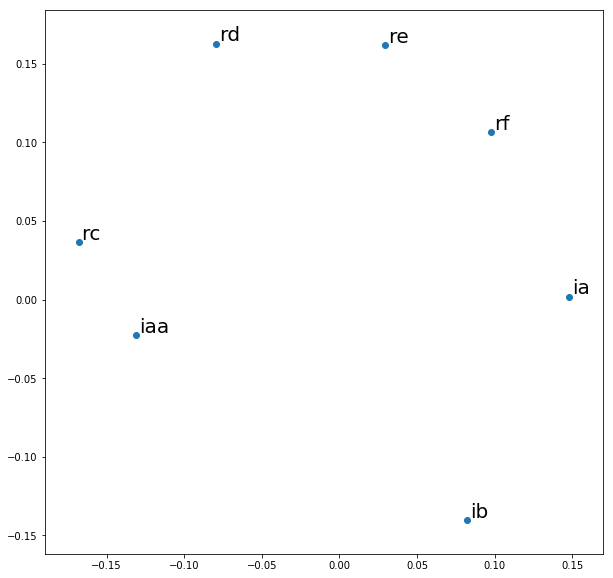

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=177)
scale = 1000
sents = {'ia': infer(a),'iaa': infer(aa), 'ib': infer(b), 'rc':infer(c), 'rd':infer(d),'re': infer(d),'rf':infer(f)}
Y = tsne.fit_transform(list(sents.values()))*scale
plt.figure(figsize=(10,10))
plt.scatter(Y[:,0], Y[:,1])
#plt.xlim(-0.0005, 0.0005)
#plt.ylim(-0.0005, 0.0005)

for l, x, y in zip(sents.keys(), Y[:,0], Y[:,1]):
    plt.annotate(l, xy=(x,y), xytext=(3,3), textcoords='offset points').set_fontsize(20)

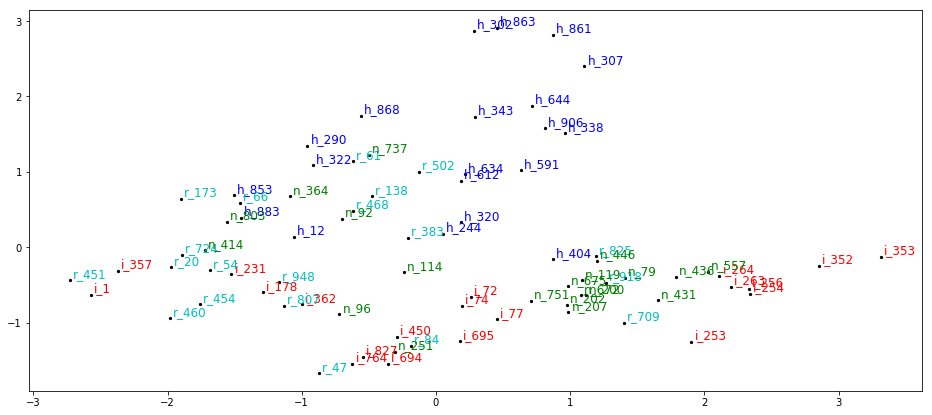

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=177)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

scale = 1
sents = dict()

for ir, r in data.train_full[data.train_full['rating']=='highly'].sample(n=20).iterrows():
    sents['h_'+str(ir)] = infer(r['THREE_SENTENCES'])
for ir, r in data.train_full[data.train_full['rating']=='irrelevant'].sample(n=20).iterrows():
    sents['i_'+str(ir)] = infer(r['THREE_SENTENCES'])
for ir, r in data.train_full[data.train_full['rating']=='relevant'].sample(n=20).iterrows():
    sents['r_'+str(ir)] = infer(r['THREE_SENTENCES'])
for ir, r in data.train_full[data.train_full['rating']=='neutral'].sample(n=20).iterrows():
    sents['n_'+str(ir)] = infer(r['THREE_SENTENCES'])
    
#Y = tsne.fit_transform(list(sents.values()))*scale
Y = pca.fit_transform(list(sents.values()))*scale

plt.figure(figsize=(16,7))
plt.scatter(Y[:,0], Y[:,1], c='black', s=5)
#plt.xlim(-0.0005, 0.0005)
#plt.ylim(-0.0005, 0.0005)

for l, x, y in zip(sents.keys(), Y[:,0], Y[:,1]):
    col = 'r'
    if l[:1] == 'h':
        col = 'b'
    if l[:1] == 'r':
        col = 'c'
    if l[:1] == 'n':
        col = 'g'
    
    plt.annotate(l, xy=(x,y), xytext=(3,3), textcoords='offset points', color=col).set_fontsize(12)

In [185]:
data.train_full.columns

Index(['COMMENT_EXPERT_1', 'COMMENT_EXPERT_1.1', 'COMMENT_EXPERT_10',
       'COMMENT_EXPERT_2', 'COMMENT_EXPERT_3', 'COMMENT_EXPERT_4',
       'COMMENT_EXPERT_5', 'COMMENT_EXPERT_6', 'COMMENT_EXPERT_7',
       'COMMENT_EXPERT_9', 'DOCUMENT_TYPE', 'FILE', 'FILER_CIK', 'FILER_NAME',
       'FILING_DATE', 'FILING_INTERVAL', 'MENTIONED_FINANCIAL_ENTITY',
       'PP_RSSD_ID', 'RATING_EXPERT_1', 'RATING_EXPERT_1.1',
       'RATING_EXPERT_10', 'RATING_EXPERT_2', 'RATING_EXPERT_3',
       'RATING_EXPERT_4', 'RATING_EXPERT_5', 'RATING_EXPERT_6',
       'RATING_EXPERT_7', 'RATING_EXPERT_9', 'ROLE', 'THREE_SENTENCES',
       'num_experts', 'rating_avg', 'rating', 'rating_min', 'rating_max',
       'grp', 'SOURCE', 'clean'],
      dtype='object')

In [193]:
r = data.train_full.loc[460]
print(r['rating'])
print(r['FILER_NAME'])
print(r['ROLE'])
print(r['MENTIONED_FINANCIAL_ENTITY'])
print('---')
print(r['THREE_SENTENCES'])

relevant
Ally Financial Inc
affiliates
Ally Bank
---
Certain transactions between Ally Bank and any of its nonbank "affiliates," including but not limited to Ally Financial Inc. are subject to federal statutory and regulatory restrictions. Pursuant to these restrictions, unless otherwise exempted, "covered transactions," including Ally Bank?s extensions of credit to and asset purchases from its nonbank affiliates, generally (1) are limited to 10% of Ally Bank?s capital stock and surplus with respect to transactions with any individual affiliate, with an aggregate limit of 20% of Ally Bank?s capital stock and surplus for all affiliates and all such transactions; (2) in the case of certain credit transactions, are subject to stringent collateralization requirements; (3) in the case of asset purchases by Ally Bank, may not involve the purchase of any asset deemed to be a "low quality asset" under federal banking guidelines; and (4) must be conducted in accordance with safe-and-sound banki

In [84]:
from code.feiii_data import DataHolder

data = DataHolder(eval_docs=2, workingfile=None)

reading file STATE-STREET_2016.csv with 23 entries.
reading file STATE-STREET_2014.csv with 26 entries.
reading file PNC_2016.csv with 33 entries.
reading file PNC_2014.csv with 38 entries.
reading file JPM_2016.csv with 52 entries.
reading file COMERICA_2016.csv with 11 entries.
reading file FIFTH-THIRD_2014.csv with 36 entries.
reading file CITIGROUP_2014.csv with 52 entries.
reading file AMERICAN-EXPRESS_2015.csv with 11 entries.
reading file BANK-OF-AMERICA_2015.csv with 74 entries.
reading file ALLY_2016.csv with 44 entries.
reading file CITIGROUP_2016.csv with 50 entries.
reading file ALLY_2014.csv with 40 entries.
reading file SUNTRUST_2013.csv with 35 entries.
reading file DISCOVER_2014.csv with 41 entries.
reading file MORGAN-STANLEY_2015.csv with 128 entries.
reading file SUNTRUST_2016.csv with 27 entries.
reading file BBT_2014.csv with 14 entries.
reading file GENERAL-ELECTRIC_2013.csv with 21 entries.
reading file FIFTH-THIRD_2015.csv with 46 entries.
reading file CAPITAL-O

In [17]:
model.vocab

{'of': <gensim.models.word2vec.Vocab at 0x7f50d02d8630>,
 'statessecurities': <gensim.models.word2vec.Vocab at 0x7f50d02d86d8>,
 'and': <gensim.models.word2vec.Vocab at 0x7f50d02d8748>,
 'exchange': <gensim.models.word2vec.Vocab at 0x7f50d02d8780>,
 'commissionwashington': <gensim.models.word2vec.Vocab at 0x7f50d02d87b8>,
 'dc': <gensim.models.word2vec.Vocab at 0x7f50d02d8828>,
 'form': <gensim.models.word2vec.Vocab at 0x7f50d02d8898>,
 'report': <gensim.models.word2vec.Vocab at 0x7f50d02d8908>,
 'pursuant': <gensim.models.word2vec.Vocab at 0x7f50d02d8940>,
 'to': <gensim.models.word2vec.Vocab at 0x7f50d02d89b0>,
 'section': <gensim.models.word2vec.Vocab at 0x7f50d02d8a20>,
 'or': <gensim.models.word2vec.Vocab at 0x7f50d02d8a90>,
 'd': <gensim.models.word2vec.Vocab at 0x7f50d02d8ac8>,
 'the': <gensim.models.word2vec.Vocab at 0x7f50d02d8b38>,
 'securities': <gensim.models.word2vec.Vocab at 0x7f50d02d8b70>,
 'act': <gensim.models.word2vec.Vocab at 0x7f50d02d8be0>,
 'for': <gensim.models.

In [14]:
model.docvecs.trained_item

<bound method DocvecsArray.trained_item of <gensim.models.doc2vec.DocvecsArray object at 0x7f50cfd65eb8>>

In [26]:
model.docvecs['SENT_99']

array([ 0.5814122 , -0.16218442, -0.59086633, -0.4115175 ,  0.08539517,
        0.42274129,  0.66192359,  0.79196435,  0.68542051, -0.17576687,
        0.16624784,  0.18501054, -0.49944451, -0.27119681,  0.25383598,
        0.43724266, -0.52467269, -0.61782402,  0.25688156, -0.97811413,
       -0.47019747, -0.55014145, -0.18704781,  0.85810113, -0.6087327 ,
        0.69867098, -0.07118148, -0.31971547,  0.09766559, -0.32470962,
       -0.44139001,  0.42358428,  1.1939522 ,  0.22066413,  0.6111989 ,
       -1.37324202, -0.01648143,  0.04478473,  0.94933075,  0.08414405], dtype=float32)